<a href="https://colab.research.google.com/github/utkarsh-prasadsinha/MLProjects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction
> Usiing XGBRegressor

In [ ]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Importing the Housiing Data

In [ ]:
house_price_dataset = pd.read_csv('Housing.csv')

In [ ]:
print(house_price_dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [ ]:
# Loading the dataset to a pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [ ]:
# Print First 5 rows of our Dataframee
house_price_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# add the target column to the dataframe
# house_price_dataframe['price'] = house_price_dataset['price']

In [ ]:
house_price_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#rows and columns
house_price_dataframe.shape

(545, 13)

In [ ]:
# Checking Missing values
house_price_dataframe.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#Statistical Measures of the Data
house_price_dataframe.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Understanding the Co-relation between various features in the dataset
1. Positive Co-relation
2. Negative Co-relation

In [ ]:
# Convert non-numerical columns (e.g., containing 'yes', 'no') to numerical representations.
# For example, if a column named 'mainroad' contains 'yes' and 'no', you can use:
house_price_dataframe['mainroad'] = house_price_dataframe['mainroad'].map({'yes': 1, 'no': 0})
house_price_dataframe['guestroom'] = house_price_dataframe['guestroom'].map({'yes': 1, 'no': 0})
house_price_dataframe['basement'] = house_price_dataframe['basement'].map({'yes': 1, 'no': 0})
house_price_dataframe['hotwaterheating'] = house_price_dataframe['hotwaterheating'].map({'yes': 1, 'no': 0})
house_price_dataframe['airconditioning'] = house_price_dataframe['airconditioning'].map({'yes': 1, 'no': 0})
house_price_dataframe['prefarea'] = house_price_dataframe['prefarea'].map({'yes': 1, 'no': 0})
house_price_dataframe['furnishingstatus'] = house_price_dataframe['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurrnished': 0})


# Calculate correlations after converting relevant columns
correlation = house_price_dataframe.corr()

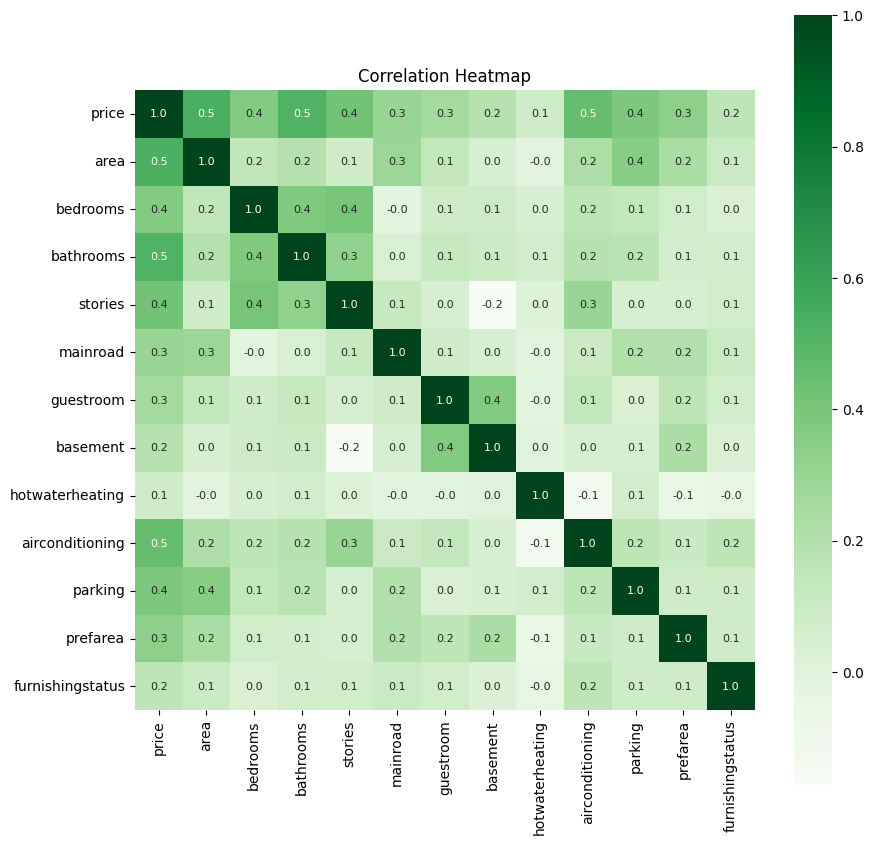

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

# Splitting the label and Target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

# Splitting the data into Training and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(545, 12) (436, 12) (109, 12)


# Model Training

In [ ]:
# loading the model
model= XGBRegressor()

In [ ]:
# Training of the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

In [ ]:
# Prediction on Training Data
# accuracy for prediction on Training Data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[ 3437637.5  4266591.   2668082.5  4787158.   4200143.   6989735.5
  2939936.5  2664837.2  6930625.5  4766770.   3323263.8  2949949.2
  6027032.5  5817667.   7800610.   4129446.5  5198711.5  4634231.5
  7822496.5  4230385.5  4177434.8  2658310.5  5234440.   4378945.
  3920028.2  4029942.5  6796436.5  9233010.   4665360.5  3161739.8
  3771301.8  3067605.5  2373787.2  4022908.   4262040.   2907373.2
  4880897.   3655500.   1917677.5  7985126.5  4092745.  12187961.
  8527664.   7397872.5  4025292.5  3215165.2  4296617.   3597510.8
  3375032.5  2506003.   5914839.5  4022023.5  3861385.5  3209968.8
  4135265.8  5314606.5  3640324.   3809019.8  3624571.5  4196324.
  7481135.   4265552.   5931341.   2788854.8  3803684.8  5540266.5
  6672290.5  5862087.5  5498747.   5596531.5  3316246.5  3617889.8
  2822821.   4869773.   5257766.   3721025.   5894736.5  4226604.5
  6762519.   5394233.   3085471.5  3579544.5  6656209.   4917530.5
  5876136.5  8387199.   2717370.2  3278769.   9782583.   4127400.

In [51]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_squared_error(Y_train, training_data_prediction, squared=False)

print("R Squared Error : ", score_1)
print('Mean Absolute Error : ', score_2)

R Squared Error :  0.9975635017896027
Mean Absolute Error :  91987.67642799216


# Visualizing the Actual Prices and Predicted Prices

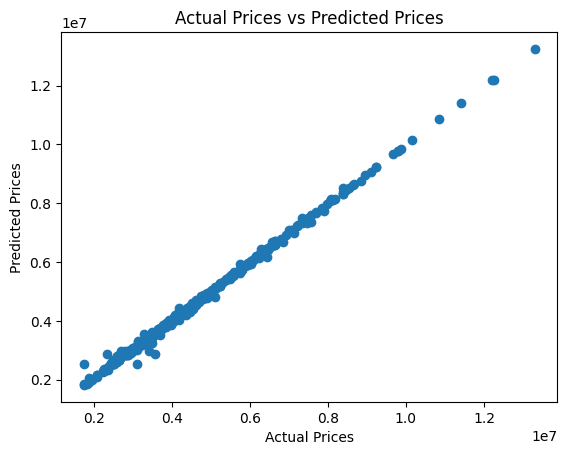

In [54]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Prediction on Test Data

In [52]:
#accuracy for performing on test data
test_data_prediction = model.predict(X_test)

In [53]:
# R Squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_squared_error(Y_test, test_data_prediction, squared=False)

print("R Squared Error : ", score_1)
print('Mean Absolute Error : ', score_2)

R Squared Error :  0.4197107368936166
Mean Absolute Error :  1435092.4289279883
